<a href="https://colab.research.google.com/github/chrissierra/MarcajeAppReactNative/blob/master/Pronostico_Acciones_desde_Yahoo_RNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal recurrente
# Parte 1 - Preprocesamiento de datos
# Importación de las bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importando el set de entrenamiento sin usar drive csv


In [3]:
#pip install Quandl

In [4]:
"""
Para tomar un csv yahoo. ------------------------------------------------------------------------------------------------
"""
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas_datareader.data as web
#import quandl as qdl
# from pandas_datareader import data as pdr
ticker = "GLD"
dataset_train = web.DataReader(ticker, 'yahoo', start="")

training_set = dataset_train.iloc[:, 2:3].values


dataset_train


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-02,109.339996,108.459999,109.010002,108.620003,4115700,108.620003
2015-09-03,108.320000,107.559998,107.769997,107.839996,3913100,107.839996
2015-09-04,107.559998,107.070000,107.139999,107.489998,4025000,107.489998
2015-09-08,107.940002,107.309998,107.599998,107.519997,5982100,107.519997
2015-09-09,106.709999,105.480003,106.639999,106.129997,8855100,106.129997
...,...,...,...,...,...,...
2020-08-25,181.250000,179.729996,181.059998,181.220001,10056100,181.220001
2020-08-26,183.580002,180.199997,180.259995,183.360001,12715800,183.360001
2020-08-27,185.169998,179.369995,185.000000,181.240005,16299200,181.240005


# Escalado de características

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creación de una estructura de datos con 60 pasos de tiempo y 1 salida

In [6]:
X_train = []
y_train = []
dias_para_pronosticar = 120
dias_pronosticados = 20
for i in range(dias_para_pronosticar, training_set.shape[0] - dias_pronosticados):
    X_train.append(training_set_scaled[i-dias_para_pronosticar:i, 0])
    y_train.append(training_set_scaled[ i:i+dias_pronosticados , 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([[0.17991816, 0.17787116, 0.17959488, ..., 0.19478561, 0.20265033,
        0.17043739],
       [0.17787116, 0.17959488, 0.19198447, ..., 0.20265033, 0.17043739,
        0.17076058],
       [0.17959488, 0.19198447, 0.18767504, ..., 0.17043739, 0.17076058,
        0.17032971],
       ...,
       [0.88903251, 0.90056011, 0.90637792, ..., 0.88332255, 0.86339144,
        0.85477257],
       [0.90056011, 0.90637792, 0.91241107, ..., 0.86339144, 0.85477257,
        0.90583921],
       [0.90637792, 0.91241107, 0.97748318, ..., 0.85477257, 0.90583921,
        0.89485015]])

# Remodelación

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Parte 2 - Construyendo el RNN

# Importación de las librerías y paquetes Keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Inicializando el RNN

In [9]:
regressor = Sequential()

# Añadiendo la primera capa de LSTM y algo de regularización de la deserción

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Añadiendo la segunda capa de LSTM y algo de regularización de la deserción

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Añadiendo la tercera capa de LSTM y algo de regularización de la deserción

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Añadiendo la cuarta capa de LSTM y algo de regularización de la deserción

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Añadiendo la capa de salida

In [14]:
regressor.add(Dense(units = dias_pronosticados))

# Compilación del RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustar el RNN al set de entrenamiento

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 8s 215ms/step - loss: 0.0346
Epoch 2/100
35/35 [==============================] - 8s 219ms/step - loss: 0.0083
Epoch 3/100
35/35 [==============================] - 8s 217ms/step - loss: 0.0071
Epoch 4/100
35/35 [==============================] - 8s 219ms/step - loss: 0.0068
Epoch 5/100
35/35 [==============================] - 8s 220ms/step - loss: 0.0059
Epoch 6/100
35/35 [==============================] - 8s 218ms/step - loss: 0.0052
Epoch 7/100
35/35 [==============================] - 8s 221ms/step - loss: 0.0050
Epoch 8/100
35/35 [==============================] - 8s 223ms/step - loss: 0.0045
Epoch 9/100
35/35 [==============================] - 8s 227ms/step - loss: 0.0044
Epoch 10/100
35/35 [==============================] - 8s 224ms/step - loss: 0.0056
Epoch 11/100
35/35 [==============================] - 8s 227ms/step - loss: 0.0038
Epoch 12/100
35/35 [==============================] - 8s 225ms/step - loss: 0.0037
Epoch 13/100


# Parte 3 - Hacer las predicciones y visualizar los resultados




# Generar datos para hacer predicción

In [17]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_train[len(dataset_train) -  dias_para_pronosticar:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

X_test.append(inputs[0:dias_para_pronosticar, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price

array([[230.57999, 236.77892, 234.99236, 237.46657, 237.15218, 238.49654,
        242.75337, 247.22469, 245.20528, 243.95769, 246.76657, 250.74435,
        249.09102, 248.73686, 245.88322, 246.15225, 247.63042, 246.37968,
        248.73409, 246.35756]], dtype=float32)

In [18]:
# Generar acá la prueba, necesito tomar los 70 ultimos datos, usar los 60. y los 10 restantes contrastarlos con la predicción
inputs_2 = dataset_train[len(dataset_train) -  (dias_para_pronosticar + dias_pronosticados):].values
inputs_2 = dataset_train[0:dias_para_pronosticar].values
inputs_2 = inputs_2.reshape(-1,1)
inputs_2 = sc.transform(inputs_2)

X_test_2 = []

X_test_2.append(inputs_2[0:dias_para_pronosticar, 0])

X_test_2 = np.array(X_test_2)

X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))

predicted_stock_price_2 = regressor.predict(X_test_2)

predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)
#contraste =  dataset_train[:].values

datos = web.DataReader(ticker, 'yahoo')
contraste = datos.iloc[  len(datos)- dias_pronosticados: , 2:3].values
contraste

array([[185.61000061],
       [191.6499939 ],
       [193.74000549],
       [192.71000671],
       [191.19999695],
       [183.57000732],
       [182.61000061],
       [181.55999756],
       [183.44000244],
       [184.69000244],
       [189.17999268],
       [187.21000671],
       [181.19000244],
       [182.13999939],
       [182.91000366],
       [181.05999756],
       [180.25999451],
       [185.        ],
       [183.97999573],
       [184.78999329]])

# Visualización de los resultados

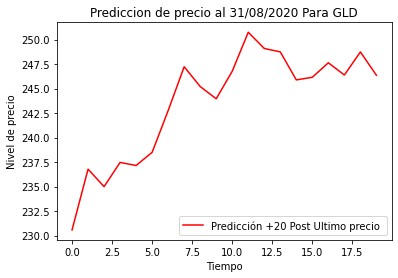

In [19]:
fecha = datetime.today().strftime("%d/%m/%Y")
plt.plot(predicted_stock_price[0], color = 'red', label = 'Predicción +20 Post Ultimo precio ')
#plt.plot(predicted_stock_price_2[0], color = 'orange', label = 'Prediccion 10 días antes')
#plt.plot(contraste, color = 'yellow', label = 'Precio Real últimos 20 días')

plt.title('Prediccion de precio al '+ fecha + ' Para ' + ticker)
plt.xlabel('Tiempo')
plt.ylabel('Nivel de precio')
plt.legend()
plt.show()

In [20]:
fecha = datetime.today().strftime("%d/%m/%Y")
fecha

'31/08/2020'

In [21]:
training_set

array([[109.01000214],
       [107.76999664],
       [107.13999939],
       ...,
       [185.        ],
       [183.97999573],
       [184.78999329]])